In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt # 학습과정 시각화
# scale 조정,  train_test_split 등을 추가

In [4]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',',skiprows=1)
data.shape

(100, 785)

In [10]:
print('타겟 :', data[1,0])
# print('이미지(784pixel=28*28) :', data[1,1:].reshape(28,28))
image =  data[1,1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [12]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

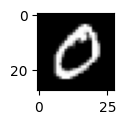

In [14]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [ ]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 읽기

In [15]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.1 MB ? eta -:--:--
   ------------ --------------------------- 12.3/38.1 MB 55.3 MB/s eta 0:00:01
   ------------------------ --------------- 23.1/38.1 MB 54.2 MB/s eta 0:00:01
   ------------------------------------ --- 34.9/38.1 MB 55.4 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 45.7 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import cv2
 # 사진 이미지를 흑백포맷으로 넘파이 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

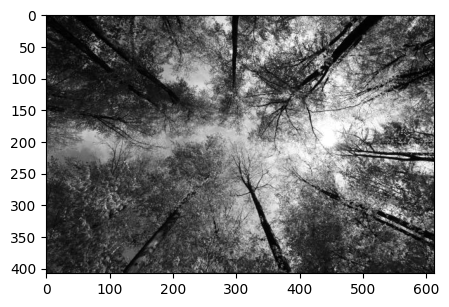

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [25]:
print(y_test[1])
# plt.imshow(X_test[1], cmap='gray')
# plt.show()

for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

2
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0

In [26]:
# Train 데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [29]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)


학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [33]:
# 입력(독립) 변수(n, 28, 28) -> (n, 28*28) ->실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(-1, 784).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [38]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
test_Y.shape, val_Y.shape, test_Y.shape

((10000, 10), (10000, 10), (10000, 10))

In [46]:
# Train 5만-700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~10 미만의 수 3개 뽑기
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

In [45]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((50000, 784),
 (50000, 10),
 (10000, 784),
 (10000, 10),
 (10000, 784),
 (10000, 10))

# 2.모델구성

In [47]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) 
# model.add.(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정설정

In [48]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])#평가지표

# 4. 모델학습

In [49]:
%%time 
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X,val_Y),
                verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 49ms/step - loss: 2.2718 - accuracy: 0.1700 - val_loss: 2.2642 - val_accuracy: 0.2200
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 2.2280 - accuracy: 0.2257 - val_loss: 2.2309 - val_accuracy: 0.2400
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 2.1849 - accuracy: 0.2600 - val_loss: 2.2025 - val_accuracy: 0.2567
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 2.1480 - accuracy: 0.2686 - val_loss: 2.1739 - val_accuracy: 0.2667
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 2.1177 - accuracy: 0.2800 - val_loss: 2.1498 - val_accuracy: 0.2733
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 2.0898 - accuracy: 0.2886 - val_loss: 2.1334 - val_accuracy: 0.2800
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 2.0659 - accuracy: 0.2929 - val_loss: 2.1152 - val_accuracy: 0.2767
Epoch 8/200
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 1.2763 - accuracy: 0.5286 - val_loss: 1.4855 - val_accuracy: 0.4567
Epoch 118/200
7/7 [==============================] - 0s 7ms/step - loss: 1.2735 - accuracy: 0.5257 - val_loss: 1.4843 - val_accuracy: 0.4567
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2698 - accuracy: 0.5271 - val_loss: 1.4816 - val_accuracy: 0.4533
Epoch 120/200
7/7 [==============================] - 0s 6ms/step - loss: 1.2672 - accuracy: 0.5271 - val_loss: 1.4786 - val_accuracy: 0.4567
Epoch 121/200
7/7 [==============================] - 0s 9ms/step - loss: 1.2640 - accuracy: 0.5286 - val_loss: 1.4766 - val_accuracy: 0.4567
Epoch 122/200
7/7 [==============================] - 0s 8ms/step - loss: 1.2611 - accuracy: 0.5300 - val_loss: 1.4749 - val_accuracy: 0.4600
Epoch 123/200
7/7 [==============================] - 0s 7ms/step - loss: 1.2582 - accuracy: 0.5314 - val_loss: 1.4735 - val_accuracy: 0.4600
Epoch 124/200
7/7 [========

# 5. 모델 평가하기

In [50]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

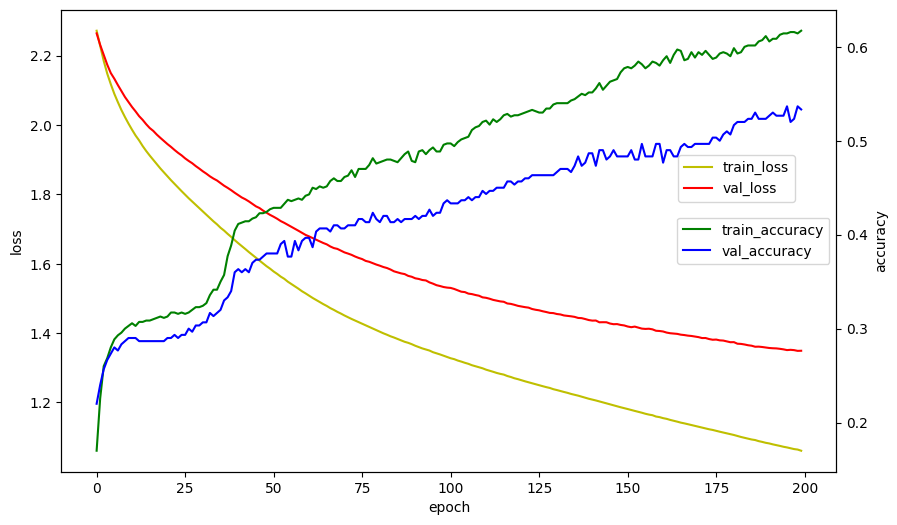

In [51]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [52]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss : ', loss_metrics[0])
print('accuracy : ', loss_metrics[1])

loss :  1.3437879085540771
accuracy :  0.5188000202178955


# ❣️위 모델(DNN)의 accuracy 늘리기
- 데이터 확보 
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data 추가, 활성화 함수 relu계열, tanh, dropout)
- epoch 조정
- optimizer 변경

In [56]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024,activation='relu'
                #,activation='leakyelu' # activation='leakyelu' 그대로 못씀
                ))
model.add(Dropout(0.3))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.3))
# model.ad(Relu())  ==  model.add(Dense(units=2),activation='Relu')
model.add(LeakyReLU(alpha=0.01))   # alpha=0.01: 음수결과에 대해 1%만 통과 (0.3이 기본) / LeakyReLU는 한 layer 더 만듦
model.add(Dense(units=10,activation='softmax'))
model.summary() # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)              

500/500 [==============================] - 6s 12ms/step - loss: 0.5612 - accuracy: 0.8156 - val_loss: 0.5032 - val_accuracy: 0.8279
Epoch 104/200
500/500 [==============================] - 6s 12ms/step - loss: 0.5908 - accuracy: 0.8082 - val_loss: 0.5935 - val_accuracy: 0.8067
Epoch 105/200
500/500 [==============================] - 6s 12ms/step - loss: 0.6077 - accuracy: 0.8106 - val_loss: 0.4893 - val_accuracy: 0.8493
Epoch 106/200
500/500 [==============================] - 6s 12ms/step - loss: 0.5570 - accuracy: 0.8242 - val_loss: 0.5741 - val_accuracy: 0.8265
Epoch 107/200
500/500 [==============================] - 7s 13ms/step - loss: 0.5917 - accuracy: 0.8168 - val_loss: 0.6466 - val_accuracy: 0.8303
Epoch 108/200
500/500 [==============================] - 7s 14ms/step - loss: 0.6355 - accuracy: 0.8164 - val_loss: 0.4834 - val_accuracy: 0.8553
Epoch 109/200
500/500 [==============================] - 7s 15ms/step - loss: 0.5524 - accuracy: 0.8320 - val_loss: 0.4804 - val_accuracy:

In [55]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 1ms/step - loss: 0.9194 - accuracy: 0.6960


[0.9193708300590515, 0.6959999799728394]

In [57]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

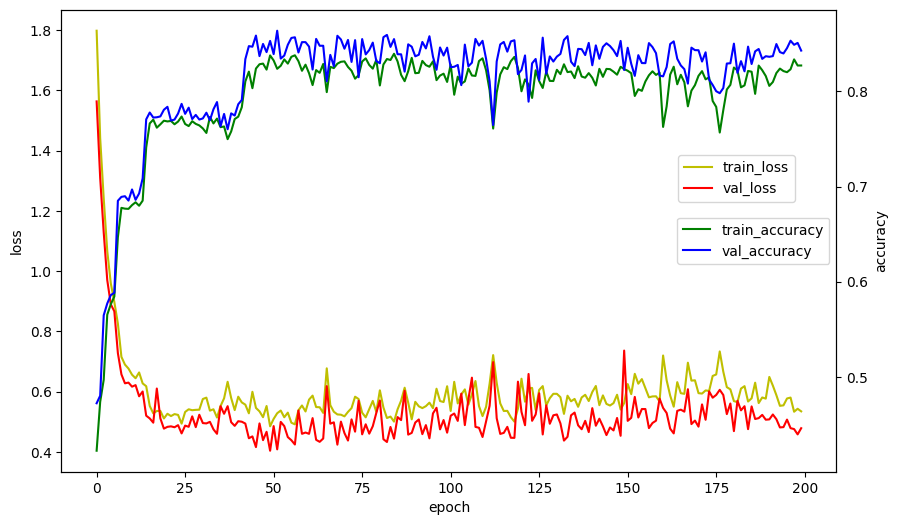

In [58]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [59]:
# 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 2s 5ms/step - loss: 0.4833 - accuracy: 0.8378


[0.48330438137054443, 0.8378000259399414]

In [69]:
# 모델 평가
score = model.evaluate(test_X, test_Y)
score[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.4833 - accuracy: 0.8378


0.8378000259399414

In [61]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test) # 실제값

True

In [64]:
# model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X), axis=1) # 예측값

313/313 [==============================] - 2s 5ms/step


In [65]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8
실제값,,,,,,,,,
0,970,0,1,0,0,2,3,1,3
1,0,1114,7,0,1,0,3,0,10
2,12,0,962,1,11,2,11,10,23
3,6,0,52,795,5,52,0,9,91
4,3,0,3,0,958,0,16,0,2
5,12,1,3,1,1,840,7,0,27
6,16,3,4,0,7,15,909,0,4
7,7,12,19,0,58,2,0,928,2
8,20,2,4,1,18,20,4,3,902


In [70]:
score = model.evaluate(test_X, test_Y)
10000 * score[1]


313/313 [==============================] - 2s 6ms/step - loss: 0.4833 - accuracy: 0.8378


8378.000259399414

# ※ 콜백함수1:로그출력

In [78]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [82]:
%%time
# 특정 에포크마다 로그출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{:.4}, acc:{:.4}, val_loss:{:.4}, val_acc:{:.4}'.format(
                self.epoch, logs.get('loss'), logs.get('accuracy', '-'),
                logs.get('val_loss', '-'), logs.get('val_accuracy', '-')
            ))
customHistory = CustomHistory()    

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory])

epoch:10, loss:1.987, acc:0.2457, val_loss:2.035, val_acc:0.1833
epoch:20, loss:1.811, acc:0.3529, val_loss:1.881, val_acc:0.3167
epoch:30, loss:1.694, acc:0.3914, val_loss:1.783, val_acc:0.3533
epoch:40, loss:1.608, acc:0.4357, val_loss:1.715, val_acc:0.3933
epoch:50, loss:1.538, acc:0.4457, val_loss:1.656, val_acc:0.4033
CPU times: total: 4.05 s
Wall time: 3.47 s


# ※ 콜백함수2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지 않고 

In [84]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)


hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlyStopping]) #콜백함수

Epoch 1/50
7/7 [==============================] - 1s 36ms/step - loss: 2.2883 - accuracy: 0.1300 - val_loss: 2.2801 - val_accuracy: 0.1067
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 2.2596 - accuracy: 0.1286 - val_loss: 2.2571 - val_accuracy: 0.1167
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 2.2301 - accuracy: 0.1229 - val_loss: 2.2345 - val_accuracy: 0.1100
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 2.2080 - accuracy: 0.1214 - val_loss: 2.2137 - val_accuracy: 0.1167
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 2.1877 - accuracy: 0.1171 - val_loss: 2.1960 - val_accuracy: 0.1167


# ※ 콜백함수3: ModelCheckpoint
- epoch마다 val_sccuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [85]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(
                filepath = file, 
                monitor='val_accuracy',
                save_best_only=True,
                mode='max',
                verbose=1
            )
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlyStopping]) #콜백함수

Epoch 1/200
7/7 [==============================] - 1s 33ms/step - loss: 2.3141 - accuracy: 0.1314 - val_loss: 2.3049 - val_accuracy: 0.0867
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 2.2924 - accuracy: 0.1243 - val_loss: 2.2952 - val_accuracy: 0.0867
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 2.2824 - accuracy: 0.1300 - val_loss: 2.2826 - val_accuracy: 0.0900
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 2.2607 - accuracy: 0.1329 - val_loss: 2.2597 - val_accuracy: 0.0933
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 2.2350 - accuracy: 0.1543 - val_loss: 2.2378 - val_accuracy: 0.1167
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 2.2050 - accuracy: 0.1514 - val_loss: 2.2114 - val_accuracy: 0.1400
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 2.1743 - accuracy: 0.1857 - val_loss: 2.1861 - val_accuracy: 0.1733
Epoch 8/200
7/7 [========